In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/pubg-finish-placement-prediction/train_V2.csv
/kaggle/input/pubg-finish-placement-prediction/test_V2.csv
/kaggle/input/pubg-finish-placement-prediction/sample_submission_V2.csv


"Getting data"

In [2]:
data = pd.read_csv('/kaggle/input/pubg-finish-placement-prediction/train_V2.csv')

In [3]:
data.head()

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
0,7f96b2f878858a,4d4b580de459be,a10357fd1a4a91,0,0,0.00,0,0,0,60,...,0,0.0000,0,0.00,0,0,244.80,1,1466,0.4444
1,eef90569b9d03c,684d5656442f9e,aeb375fc57110c,0,0,91.47,0,0,0,57,...,0,0.0045,0,11.04,0,0,1434.00,5,0,0.6400
2,1eaf90ac73de72,6a4a42c3245a74,110163d8bb94ae,1,0,68.00,0,0,0,47,...,0,0.0000,0,0.00,0,0,161.80,2,0,0.7755
3,4616d365dd2853,a930a9c79cd721,f1f1f4ef412d7e,0,0,32.90,0,0,0,75,...,0,0.0000,0,0.00,0,0,202.70,3,0,0.1667
4,315c96c26c9aac,de04010b3458dd,6dc8ff871e21e6,0,0,100.00,0,0,0,45,...,0,0.0000,0,0.00,0,0,49.75,2,0,0.1875


In [4]:
data.shape

(4446966, 29)

"Preparing"

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4446966 entries, 0 to 4446965
Data columns (total 29 columns):
 #   Column           Dtype  
---  ------           -----  
 0   Id               object 
 1   groupId          object 
 2   matchId          object 
 3   assists          int64  
 4   boosts           int64  
 5   damageDealt      float64
 6   DBNOs            int64  
 7   headshotKills    int64  
 8   heals            int64  
 9   killPlace        int64  
 10  killPoints       int64  
 11  kills            int64  
 12  killStreaks      int64  
 13  longestKill      float64
 14  matchDuration    int64  
 15  matchType        object 
 16  maxPlace         int64  
 17  numGroups        int64  
 18  rankPoints       int64  
 19  revives          int64  
 20  rideDistance     float64
 21  roadKills        int64  
 22  swimDistance     float64
 23  teamKills        int64  
 24  vehicleDestroys  int64  
 25  walkDistance     float64
 26  weaponsAcquired  int64  
 27  winPoints   

No missing values except one value in winPlacePerc

In [6]:
data.isnull().sum()

Id                 0
groupId            0
matchId            0
assists            0
boosts             0
damageDealt        0
DBNOs              0
headshotKills      0
heals              0
killPlace          0
killPoints         0
kills              0
killStreaks        0
longestKill        0
matchDuration      0
matchType          0
maxPlace           0
numGroups          0
rankPoints         0
revives            0
rideDistance       0
roadKills          0
swimDistance       0
teamKills          0
vehicleDestroys    0
walkDistance       0
weaponsAcquired    0
winPoints          0
winPlacePerc       1
dtype: int64

In [7]:
data[data['winPlacePerc'].isnull()]

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
2744604,f70c74418bb064,12dfbede33f92b,224a123c53e008,0,0,0.0,0,0,0,1,...,0,0.0,0,0.0,0,0,0.0,0,0,NaN


Drop missing value

In [8]:
data=data.drop(2744604)
data=data.reset_index(drop=True)

In [9]:
data.describe()

,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
count,4.446965e+06,4.446965e+06,4.446965e+06,4.446965e+06,4.446965e+06,4.446965e+06,4.446965e+06,4.446965e+06,4.446965e+06,4.446965e+06,...,4.446965e+06,4.446965e+06,4.446965e+06,4.446965e+06,4.446965e+06,4.446965e+06,4.446965e+06,4.446965e+06,4.446965e+06,4.446965e+06
mean,2.338150e-01,1.106908e+00,1.307172e+02,6.578757e-01,2.268196e-01,1.370148e+00,4.759936e+01,5.050062e+02,9.247835e-01,5.439553e-01,...,1.646590e-01,6.061158e+02,3.496092e-03,4.509323e+00,2.386841e-02,7.918209e-03,1.154218e+03,3.660488e+00,6.064603e+02,4.728216e-01
std,5.885731e-01,1.715794e+00,1.707806e+02,1.145743e+00,6.021553e-01,2.679982e+00,2.746293e+01,6.275049e+02,1.558445e+00,7.109721e-01,...,4.721671e-01,1.498344e+03,7.337297e-02,3.050220e+01,1.673935e-01,9.261158e-02,1.183497e+03,2.456543e+00,7.397005e+02,3.074050e-01
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.400000e+01,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.551000e+02,2.000000e+00,0.000000e+00,2.000000e-01
50%,0.000000e+00,0.000000e+00,8.424000e+01,0.000000e+00,0.000000e+00,0.000000e+00,4.700000e+01,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,6.856000e+02,3.000000e+00,0.000000e+00,4.583000e-01
75%,0.000000e+00,2.000000e+00,1.860000e+02,1.000000e+00,0.000000e+00,2.000000e+00,7.100000e+01,1.172000e+03,1.000000e+00,1.000000e+00,...,0.000000e+00,1.910000e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.976000e+03,5.000000e+00,1.495000e+03,7.407000e-01
max,2.200000e+01,3.300000e+01,6.616000e+03,5.300000e+01,6.400000e+01,8.000000e+01,1.010000e+02,2.170000e+03,7.200000e+01,2.000000e+01,...,3.900000e+01,4.071000e+04,1.800000e+01,3.823000e+03,1.200000e+01,5.000000e+00,2.578000e+04,2.360000e+02,2.013000e+03,1.000000e+00


In [10]:
data['matchType'].value_counts()

squad-fpp           1756186
duo-fpp              996691
squad                626526
solo-fpp             536761
duo                  313591
solo                 181943
normal-squad-fpp      17174
crashfpp               6287
normal-duo-fpp         5489
flaretpp               2505
normal-solo-fpp        1682
flarefpp                718
normal-squad            516
crashtpp                371
normal-solo             326
normal-duo              199
Name: matchType, dtype: int64

"Visualization"
Match type isn't effective in winning 

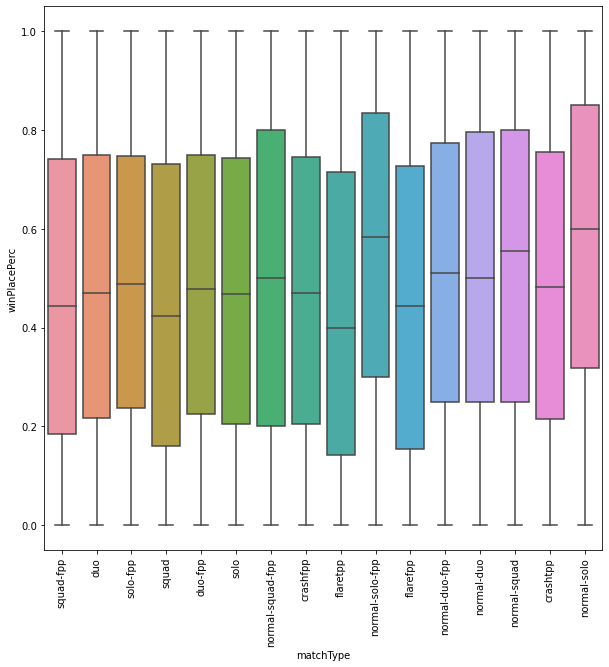

In [11]:
plt.figure(figsize=(10,10))
sns.boxplot(data=data,x='matchType',y='winPlacePerc')
plt.xticks(rotation=90)
plt.show()

No.of kills ,walk distance ,headshotKills and damage dealt are effective in winning
Zero kills may be cheaters or have a good team
Zero walk distance definitely cheaters
Win points ,rank points , match duration aren't effective , kill streak effect only more than 9

<AxesSubplot:xlabel='winPlacePerc', ylabel='kills'>

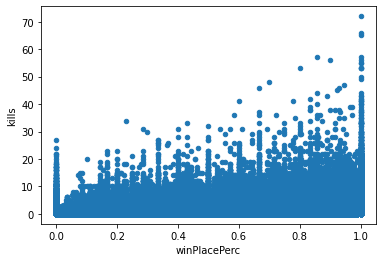

In [12]:
data.plot(kind='scatter' , x='winPlacePerc',y='kills')

<AxesSubplot:xlabel='winPlacePerc', ylabel='headshotKills'>

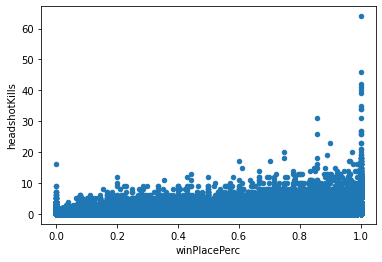

In [13]:
data.plot(kind='scatter' , x='winPlacePerc',y='headshotKills')

<AxesSubplot:xlabel='winPlacePerc', ylabel='rankPoints'>

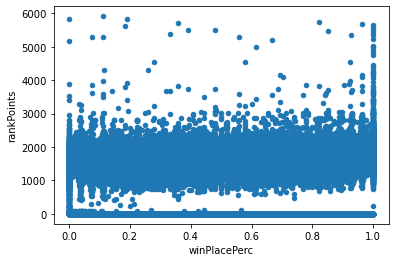

In [14]:
data.plot(kind='scatter' , x='winPlacePerc',y='rankPoints')

<AxesSubplot:xlabel='winPlacePerc', ylabel='winPoints'>

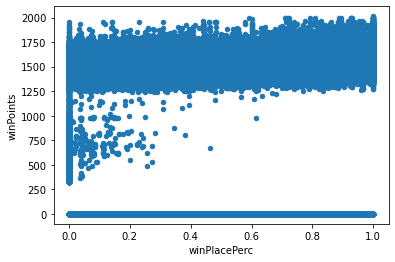

In [15]:
data.plot(kind='scatter' , x='winPlacePerc',y='winPoints')

<AxesSubplot:xlabel='winPlacePerc', ylabel='matchDuration'>

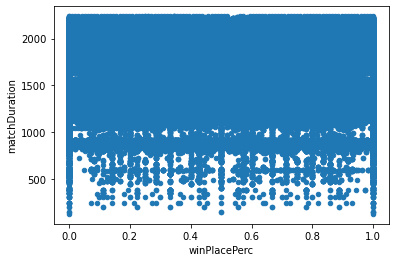

In [16]:
data.plot(kind='scatter' , x='winPlacePerc',y='matchDuration')

<AxesSubplot:xlabel='winPlacePerc', ylabel='longestKill'>

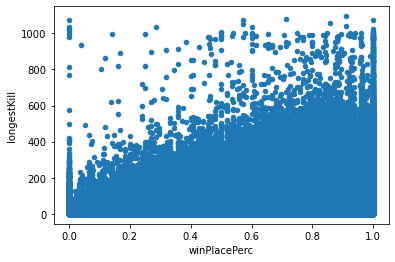

In [17]:
data.plot(kind='scatter' , x='winPlacePerc',y='longestKill')

<AxesSubplot:xlabel='winPlacePerc', ylabel='killStreaks'>

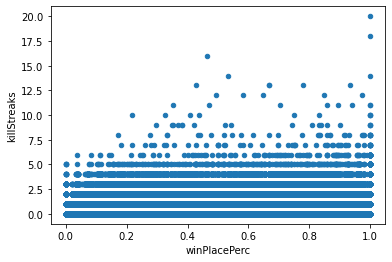

In [18]:
data.plot(kind='scatter' , x='winPlacePerc',y='killStreaks')

<AxesSubplot:xlabel='winPlacePerc', ylabel='killPoints'>

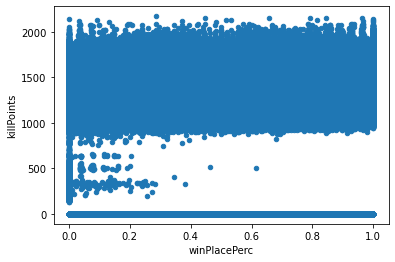

In [19]:
data.plot(kind='scatter' , x='winPlacePerc',y='killPoints')

<AxesSubplot:xlabel='winPlacePerc', ylabel='walkDistance'>

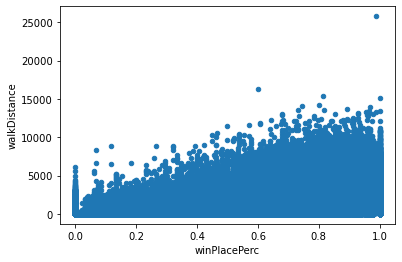

In [20]:
data.plot(kind='scatter' , x='winPlacePerc',y='walkDistance')

<AxesSubplot:xlabel='winPlacePerc', ylabel='damageDealt'>

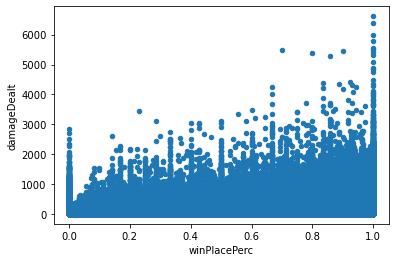

In [21]:
data.plot(kind='scatter' , x='winPlacePerc',y='damageDealt')

<AxesSubplot:xlabel='winPlacePerc', ylabel='weaponsAcquired'>

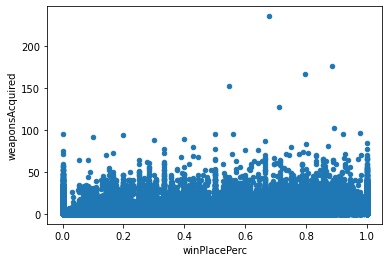

In [22]:
data.plot(kind='scatter' , x='winPlacePerc',y='weaponsAcquired')

In [23]:
data.headshotKills.value_counts()

0     3696115
1      574741
2      126348
3       32975
4        9962
5        3616
6        1439
7         757
8         373
9         215
10        136
11         79
12         64
13         44
14         23
15         16
16         15
17         11
18          9
19          3
20          3
23          3
26          3
21          2
27          2
31          2
34          2
35          1
39          1
40          1
41          1
42          1
46          1
64          1
Name: headshotKills, dtype: int64

you need more than 3 head shots to increase your probabilty to win , more than 34 is definitely cheaters

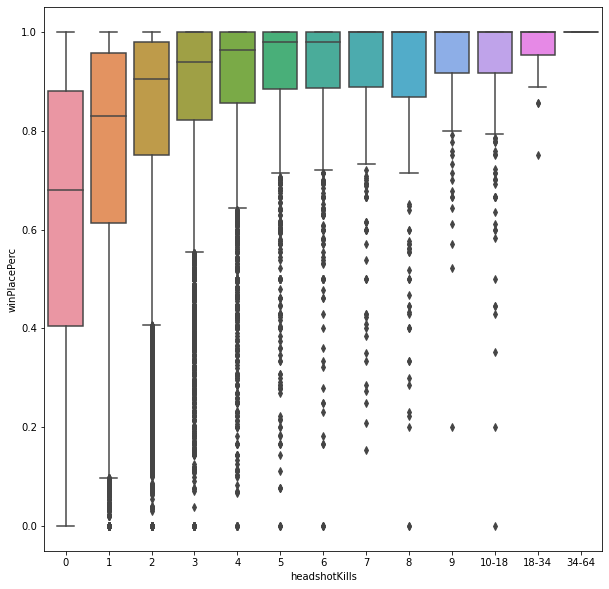

In [24]:
plt.figure(figsize=(10,10))
kill=pd.cut(data['headshotKills'],[0,1,2,3,4,5,6,7,8,9,10,18,34,64]
           ,labels=['0','1','2','3','4','5','6','7','8','9','10-18','18-34','34-64'])

sns.boxplot(data=data,x=kill,y='winPlacePerc')
plt.show()

In [25]:
data['weaponsAcquired'].value_counts()

2      768836
3      768347
4      689622
1      580951
5      540721
        ...  
77          1
75          1
74          1
71          1
236         1
Name: weaponsAcquired, Length: 97, dtype: int64

To increase your win probability you shoud have weapons from 6 to 20 , more than 20 may be cheaters

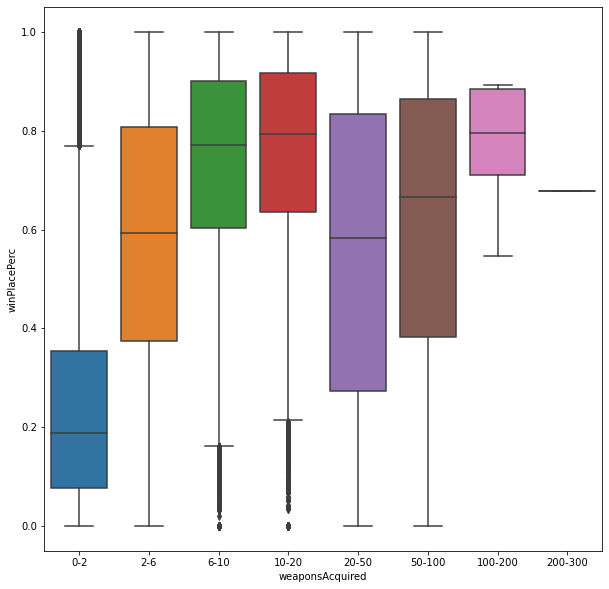

In [26]:
plt.figure(figsize=(10,10))

weap=pd.cut(data['weaponsAcquired'],[0,2,6,10,20,50,100,200,300],
           labels=['0-2','2-6','6-10','10-20','20-50','50-100','100-200','200-300'])
sns.boxplot(data=data ,x=weap ,y='winPlacePerc')
plt.show()

In [27]:
data['kills'].value_counts()

0     2529721
1      928079
2      472466
3      232441
4      124543
5       66577
6       37960
7       21816
8       12779
9        7644
10       4599
11       2799
12       1755
13       1137
14        757
15        484
16        325
17        234
18        165
19        112
20        109
22         77
21         70
23         47
24         44
25         27
26         27
28         22
27         21
31         13
29         13
30         13
33         12
36          8
35          7
38          7
41          5
34          5
37          5
32          4
39          4
40          4
53          4
42          3
43          3
57          2
56          2
55          2
44          2
46          2
49          1
50          1
48          1
47          1
45          1
65          1
66          1
72          1
Name: kills, dtype: int64

You must kill more than 5 to increase your probabilty to win , more than 50 is definitely cheaters

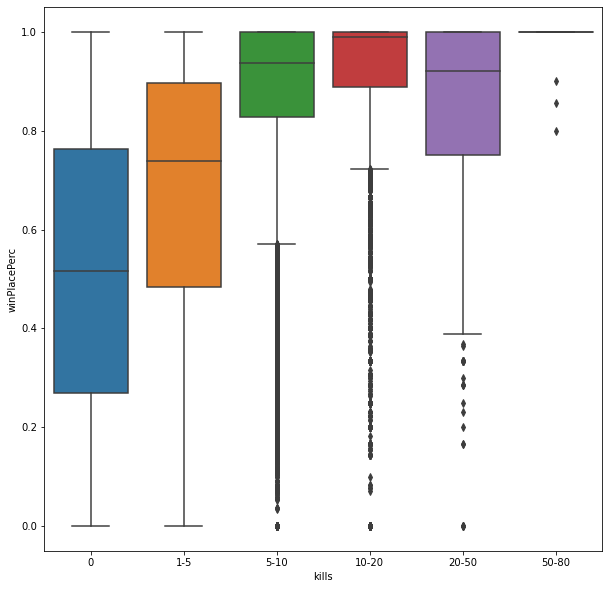

In [28]:
plt.figure(figsize=(10,10))
kill=pd.cut(data['kills'],[0,1,5,10,20,50,80],
           labels=['0','1-5','5-10','10-20','20-50','50-80'])
sns.boxplot(data=data ,x=kill ,y='winPlacePerc')
plt.show()

In [29]:
data['matchType']=data['matchType'].astype('category').cat.codes

Correlation matrix

In [30]:
corr=data.corr()

<AxesSubplot:>

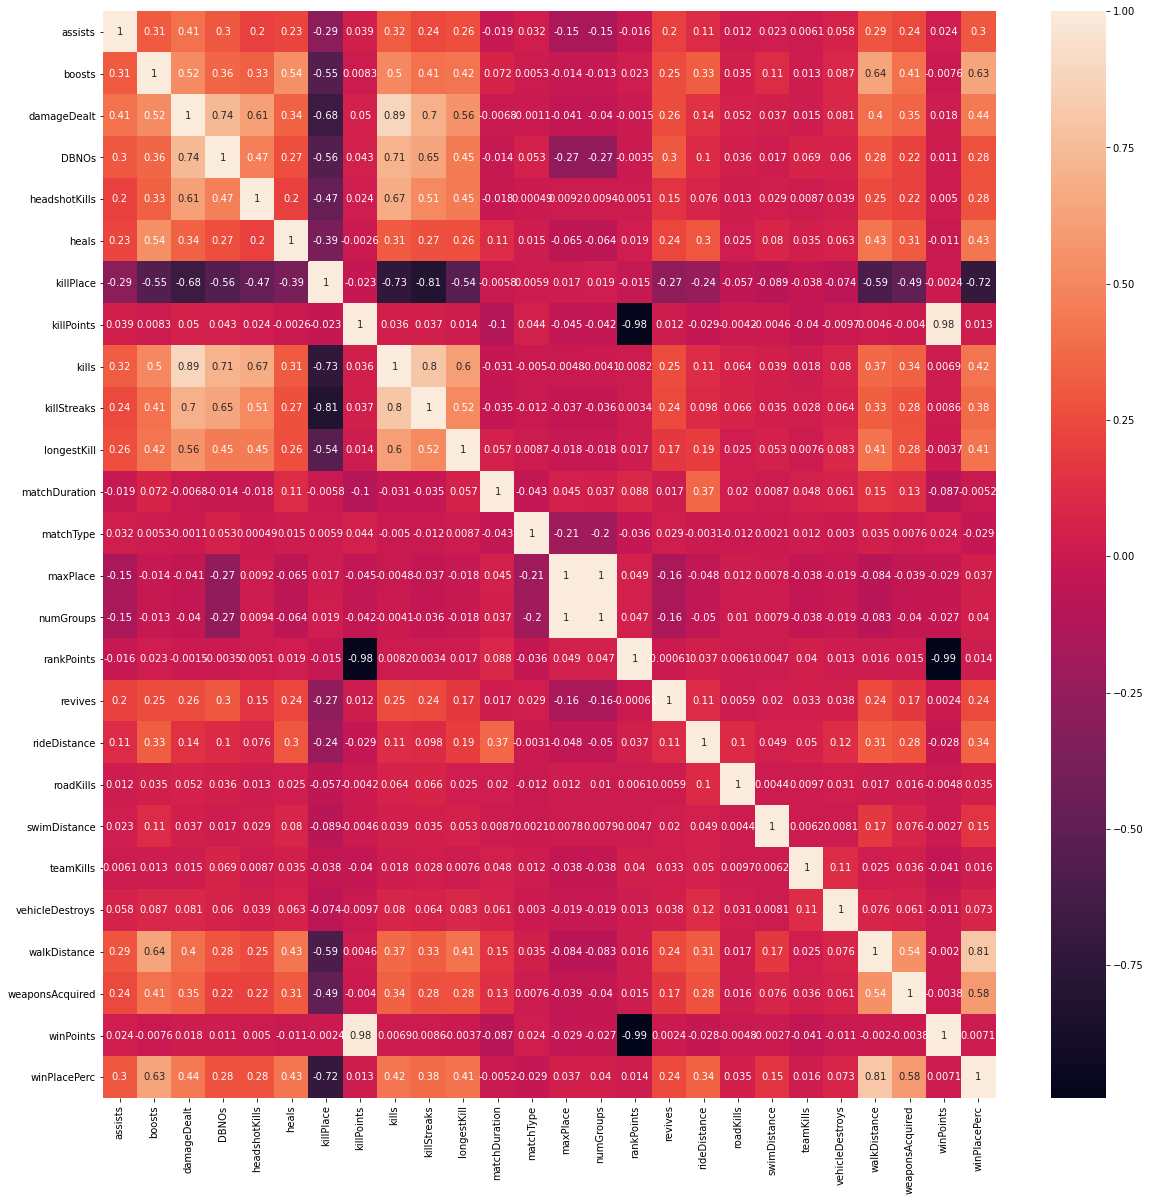

In [31]:
plt.figure(figsize=(20,20))

sns.heatmap(corr,annot=True)

Drop unnecessary columns

In [32]:
data.drop(['Id','groupId','matchId','killPoints','winPoints','rankPoints',
           'matchDuration','maxPlace','numGroups','roadKills','vehicleDestroys'] ,axis=1 , inplace=True)

Treat outliers

In [33]:
def IQ(IQR) :
    Q1=data.quantile(.25)
    Q3=data.quantile(.75)
    IQR=Q3-Q1
    mini=Q1-1.5*IQR
    maxi=Q3+1.5*IQR
    final=(data<=maxi)&(data>=mini)
    data=data[final]


In [34]:
data.shape

(4446965, 18)

In [35]:
X=data.drop('winPlacePerc',axis=1)
y=data['winPlacePerc']

"Feature selection"
First way "I have not used it for this model " to feature importance 

In [36]:
#from sklearn.ensemble import ExtraTreesClassifier
#ex=ExtraTreesClassifier()
#ex.fit(X,y)
#print(ex.feature_importances_)
#feat_importances = pd.Series(ex.feature_importances_, index=X.columns)
#feat_importances.nlargest(10).plot(kind='barh')
#plt.show()

To select 15 of the best features  

In [37]:
from sklearn.feature_selection import SelectKBest,f_regression
best=SelectKBest(score_func=f_regression,k='all')
fit=best.fit(X,y)
dfScores=pd.DataFrame(fit.scores_)
dfCol=pd.DataFrame(X.columns)
featScore=pd.concat([dfCol,dfScores],axis=1)
featScore.columns=['Feature','Score']
featScore=featScore.sort_values(by='Score',ascending=False).reset_index(drop=True)
print(featScore.nlargest(15,'Score'))

            Feature         Score
0      walkDistance  8.538333e+06
1         killPlace  4.761146e+06
2            boosts  2.992579e+06
3   weaponsAcquired  2.299340e+06
4       damageDealt  1.070677e+06
5             heals  9.964866e+05
6             kills  9.519953e+05
7       longestKill  8.993963e+05
8       killStreaks  7.393410e+05
9      rideDistance  5.926046e+05
10          assists  4.380104e+05
11            DBNOs  3.782118e+05
12    headshotKills  3.716592e+05
13          revives  2.739221e+05
14     swimDistance  1.018124e+05


In [38]:
X=X[featScore.Feature[:15].values]

Feature scaling

In [39]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X=scaler.fit_transform(X)

Splitting data , here I made test size =.40 not .20 because dataset large

In [40]:
from sklearn.model_selection import train_test_split ,cross_val_score
X_train ,X_test,y_train ,y_test =train_test_split(X,y,test_size =.40 , random_state=42)


Try linear regression model

In [56]:
from sklearn.linear_model import LinearRegression
reg=LinearRegression()
reg.fit(X_train,y_train)
cv_result=cross_val_score(reg ,X_train,y_train,cv=5 , scoring='neg_mean_squared_error')
-cv_result

array([0.0183671 , 0.01834632, 0.01843653, 0.01843414, 0.01833   ])

Try Lasso regression model

In [42]:
from sklearn.linear_model import Lasso
lasso=Lasso(alpha=.0001)
cv_result=cross_val_score(lasso,X_train,y_train,cv=5 , scoring='neg_mean_squared_error')
-cv_result


array([0.01836801, 0.01834658, 0.01843676, 0.01843447, 0.01833026])

Try elastic net regression model

In [43]:
from sklearn.linear_model import ElasticNet
net=ElasticNet()
cv_result=cross_val_score(net,X_train,y_train,cv=5 , scoring='neg_mean_squared_error')
-cv_result

array([0.09455928, 0.09452753, 0.09455651, 0.09443755, 0.0945556 ])

Try decision trees model

In [44]:
from sklearn.tree import DecisionTreeRegressor
tree=DecisionTreeRegressor(random_state=42)
cv_result=cross_val_score(tree,X_train,y_train,cv=5 , scoring='neg_mean_squared_error')
-cv_result

array([0.02004324, 0.02008623, 0.02005439, 0.02013025, 0.02005112])

Try random forest model

In [57]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor(n_estimators=50)
cv_result=cross_val_score(rf,X_train,y_train,cv=5 , scoring='neg_mean_squared_error')
-cv_result

array([0.0105834 , 0.01059488, 0.01053049, 0.01062547, 0.01052988])

Try stochastic gradient descent model

In [45]:
from sklearn.linear_model import SGDRegressor
sgd=SGDRegressor(max_iter=1000, tol=1e-3, penalty=None, eta0=0.1)
cv_result=cross_val_score(sgd,X_train,y_train,cv=5 , scoring='neg_mean_squared_error')
-cv_result

array([0.0186282 , 0.01882258, 0.01867238, 0.01877397, 0.01847282])

Finally try Vorting regression model to vote best model

In [52]:
from sklearn.ensemble import VotingRegressor
vot=VotingRegressor([('LinearRegression',reg),('DecisionTrees',tree),('LassoRegression',lasso),('RandomForest',rf),
                     ('ElasticNet',net),('StochasticGradientDescent',sgd)])
vot.fit(X_train,y_train)
y_pred=vot.predict(X_test)


In [53]:
from sklearn.metrics import r2_score,mean_squared_error
mean_squared_error(y_test,y_pred)
r2_score(y_test,y_pred)

0.8303973903146769

Tunning 

In [46]:
from sklearn.model_selection import GridSearchCV
params={'fit_intercept':[True,False],'normalize':[True,False]}
grid =GridSearchCV(reg,params ,cv=5 ,scoring='neg_mean_squared_error',n_jobs=-1)
grid.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=LinearRegression(), n_jobs=-1,
             param_grid={'fit_intercept': [True, False],
                         'normalize': [True, False]},
             scoring='neg_mean_squared_error')

In [47]:
grid.best_params_


{'fit_intercept': True, 'normalize': False}

In [48]:
grid.best_estimator_

LinearRegression()

In [49]:
-grid.best_score_

0.0183828180237691

handling test set

In [58]:
test=pd.read_csv('/kaggle/input/pubg-finish-placement-prediction/test_V2.csv')

In [59]:
test.head()

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,rankPoints,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints
0,9329eb41e215eb,676b23c24e70d6,45b576ab7daa7f,0,0,51.46,0,0,0,73,...,1500,0,0.0,0,0.0,0,0,588.0,1,0
1,639bd0dcd7bda8,430933124148dd,42a9a0b906c928,0,4,179.10,0,0,2,11,...,1503,2,4669.0,0,0.0,0,0,2017.0,6,0
2,63d5c8ef8dfe91,0b45f5db20ba99,87e7e4477a048e,1,0,23.40,0,0,4,49,...,1565,0,0.0,0,0.0,0,0,787.8,4,0
3,cf5b81422591d1,b7497dbdc77f4a,1b9a94f1af67f1,0,0,65.52,0,0,0,54,...,1465,0,0.0,0,0.0,0,0,1812.0,3,0
4,ee6a295187ba21,6604ce20a1d230,40754a93016066,0,4,330.20,1,2,1,7,...,1480,1,0.0,0,0.0,0,0,2963.0,4,0


In [60]:
final = test.drop(['Id','groupId','matchType','matchId','killPoints','numGroups','winPoints','rankPoints',
           'matchDuration','maxPlace','roadKills','teamKills','vehicleDestroys'],axis=1)

In [61]:
final=scaler.fit_transform(final)


In [62]:
Id=test['Id']

In [63]:
winPlacePerc = reg.predict(final)

In [64]:
prediction =pd.concat([Id,pd.Series(winPlacePerc)],axis=1)


In [65]:
prediction=prediction.rename(columns={0:'winPlacePerc'})


submission


In [67]:
prediction.to_csv('submission.csv',index=False)